In [2]:
library(RSNNS)
library(NeuralNetTools)
#load example from file choose 1 to 6


In [5]:
load(file="muestra1.rda")
nc=5
trai=training
Values <- trai[,1:nc-1]
Targets <- trai[,nc]
# test/train change ratio if you want
trai <- splitForTrainingAndTest(Values, Targets, ratio=0.15)
str(trai)
# size defines the topology size=n one hidden with n neurons, size=c(n,m,s), three layers with n,m,s
# outputActFunc, activation function
# learnFunc learning type with learnFuncParams defining the parameter(s) i.e. learning rate, momentum
# maxit number of iterations 
#http://www.ra.cs.uni-tuebingen.de/SNNS/UserManual/node52.html




List of 4
 $ inputsTrain : num [1:1700, 1:4] 0.6615 0.4295 0.2014 0.0173 0.4263 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1700] "592" "1287" "1445" "1833" ...
  .. ..$ : chr [1:4] "x" "y" "z" "k"
 $ targetsTrain: num [1:1700] 1 0 0 0 1 1 0 1 0 1 ...
 $ inputsTest  : num [1:300, 1:4] -0.152 0.175 0.124 0.779 0.787 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:300] "1545" "399" "1015" "982" ...
  .. ..$ : chr [1:4] "x" "y" "z" "k"
 $ targetsTest : num [1:300] 0 1 0 1 1 0 1 1 0 0 ...


In [15]:
model <- mlp(trai$inputsTrain,trai$targetsTrain,size=c(20,20),
             inputsTest = trai$inputsTest, targetsTest = trai$targetsTest,
             outputActFunc = "Act_Logistic",
#             learnFunc = "Std_Backpropagation",learnFuncParams = c(0.1),
#             learnFunc = "BackpropMomentum",learnFuncParams = c(0.1,0.1), 
             learnFunc = "SCG", learnFuncParams = c(0.1),
              maxit = 1000)
summary(model)

SNNS network definition file V1.4-3D
generated at Mon Feb 03 20:47:24 2020

network name : RSNNS_untitled
source files :
no. of units : 45
no. of connections : 500
no. of unit types : 0
no. of site types : 0


learning function : SCG
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0.00000 |  0.00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName    | act      | bias     | st | position | act func     | out func | sites
----|----------|-------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_x     | -0.08287 | -0.09776 | i  |  1, 0, 0 | Act_Identity |          | 
  2 |          | Input_y     |  0.05823 |  0.11399 | i  |  2, 0, 0 | Act_Identity |      

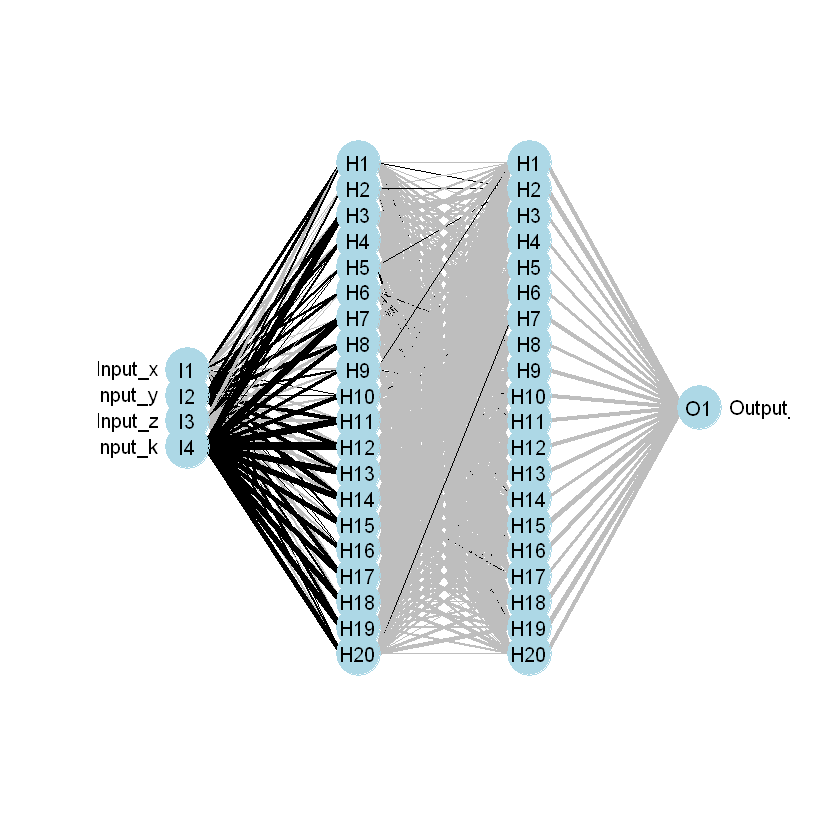

In [9]:
plotnet(model)


[1] NA

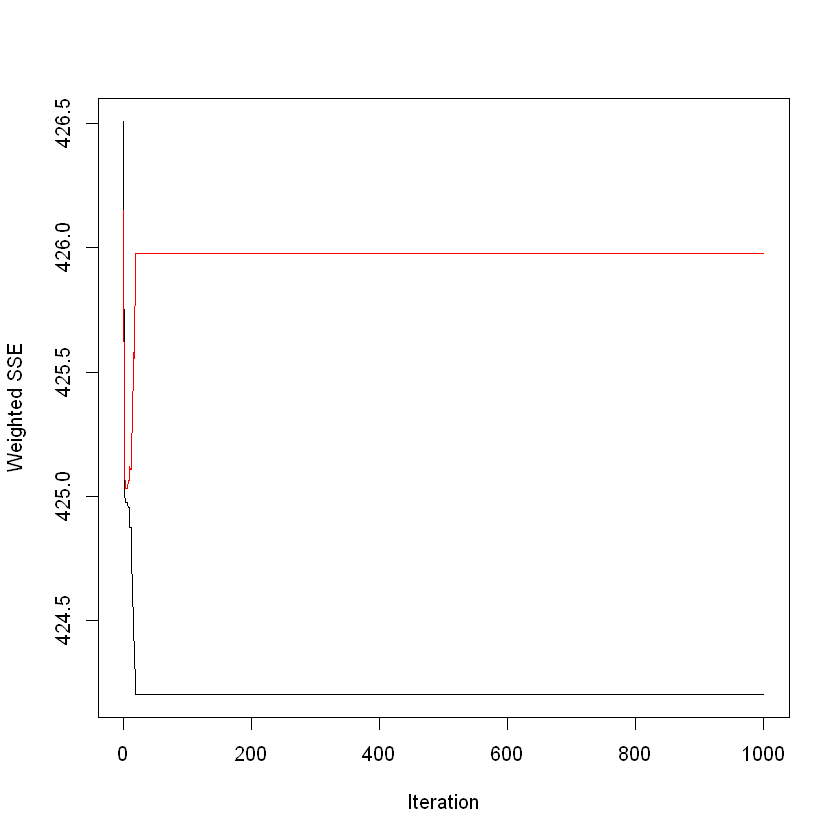

In [16]:
plotIterativeError(model)
sum(model$fitted.values[Targets==0]>0.5)



$names
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "IterativeTestError"    "fitted.values"        
[16] "fittedTestValues"      "nOutputs"             

$class
[1] "mlp"   "rsnns"

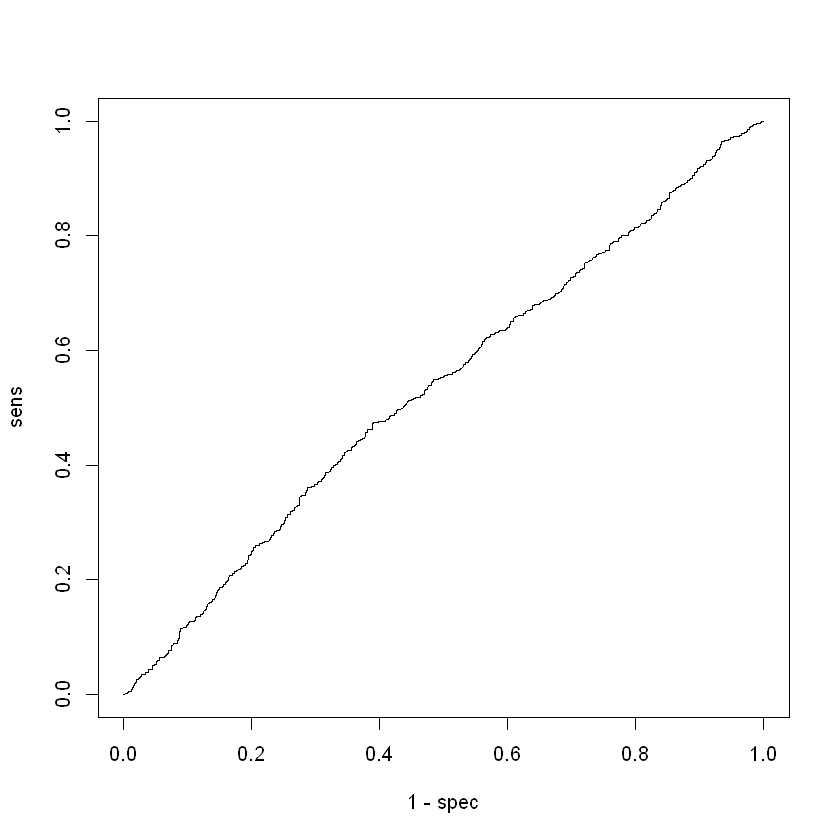

In [17]:
plotROC(model$fitted.values,Targets)
attributes(model)

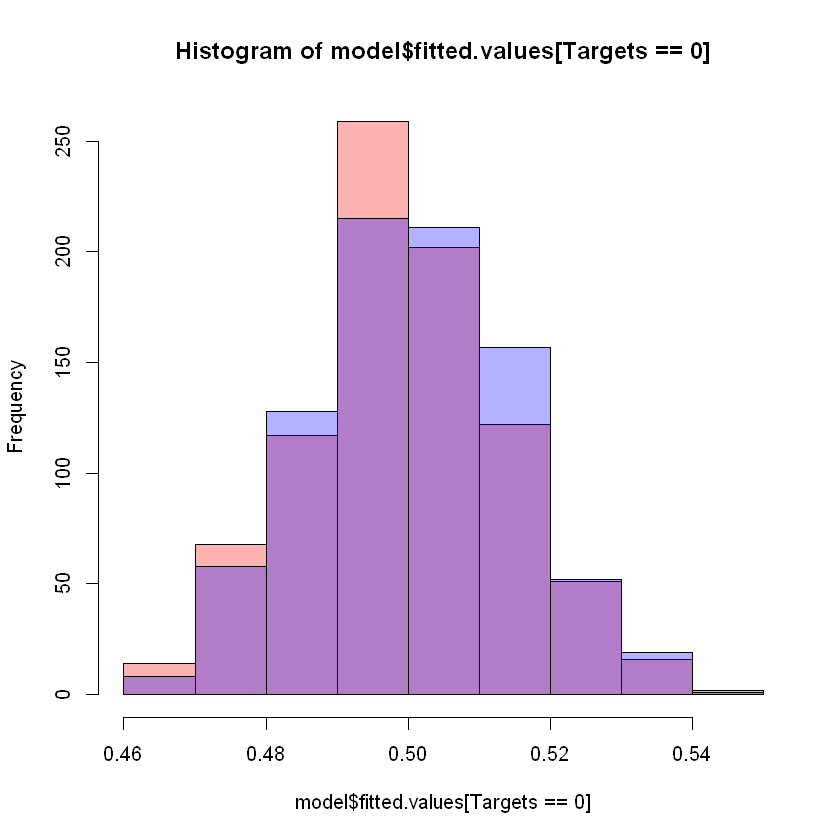

In [18]:
hist(model$fitted.values[Targets==0],col=rgb(1,0,0,0.3))
hist(model$fitted.values[Targets==1],col=rgb(0,0,1,0.3),add=T)


null device 
          1

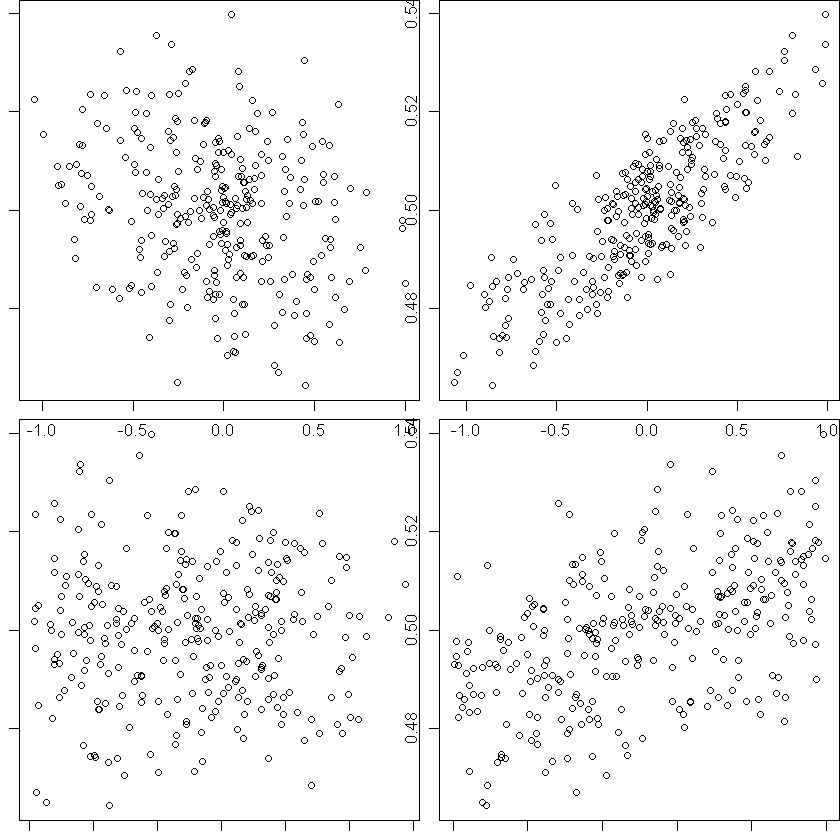

In [19]:
par(mfrow = c(2, 2),     # 2x2 layout
    oma = c(0, 0, 0, 0), # two rows of text at the outer left and bottom margin
    mar = c(1, 1, 0, 0), # space for one row of text at ticks and to separate plots
    mgp = c(2, 1, 0),    # axis label at 2 rows distance, tick labels at 1 row
    xpd = NA)            # allow content to protrude into outer margin (and beyond)
plot(trai$inputsTest[,1],predict(model,trai$inputsTest),xlab="",ylab="")
plot(trai$inputsTest[,2],predict(model,trai$inputsTest),xlab="",ylab="")
plot(trai$inputsTest[,3],predict(model,trai$inputsTest),xlab="",ylab="")
plot(trai$inputsTest[,4],predict(model,trai$inputsTest),xlab="",ylab="")
par(mfrow=c(1,1))
dev.off()